In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

In [8]:
# Read Dataset
df = pd.read_csv('../data/OLX_cars_dataset00.csv')

# Convert Tipe Data
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9179 entries, 0 to 9178
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Ad ID              9179 non-null   int64         
 1   Car Name           9179 non-null   object        
 2   Make               9179 non-null   object        
 3   Model              9179 non-null   object        
 4   Year               9179 non-null   datetime64[ns]
 5   KM's driven        9179 non-null   int64         
 6   Price              9179 non-null   int64         
 7   Fuel               9179 non-null   object        
 8   Registration city  9179 non-null   object        
 9   Car documents      9179 non-null   object        
 10  Assembly           9179 non-null   object        
 11  Transmission       9179 non-null   object        
 12  Condition          9179 non-null   object        
 13  Seller Location    9179 non-null   object        
 14  Descript

In [9]:
df.describe(include="all")

,Ad ID,Car Name,Make,Model,Year,KM's driven,Price,Fuel,Registration city,Car documents,Assembly,Transmission,Condition,Seller Location,Description,Car Features,Images URL's,Car Profile
count,9.179000e+03,9179,9179,9179,9179,9179.000000,9.179000e+03,9179,9179,9179,9179,9179,9179,9179,9179,9179,9179,8721
unique,NaN,7970,11,58,NaN,NaN,NaN,4,61,2,2,2,1,2768,8866,5978,8976,8524
top,NaN,Honda City,Suzuki,City IVTEC,NaN,NaN,NaN,Petrol,Lahore,Original,Local,Manual,Used,"Gulshan-e-Iqbal, Karachi",(View phone number),Air Conditioning,['https://images.olx.com.pk/thumbnails/4109495...,https://www.olx.com.pk/item/honda-city-iid-108...
freq,NaN,33,3048,649,NaN,NaN,NaN,8984,3449,9111,5999,5633,9179,166,37,239,2,2
mean,1.079720e+09,NaN,NaN,NaN,2012-04-08 15:14:08.327704576,96570.420525,2.036814e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.019824e+09,NaN,NaN,NaN,1989-01-01 00:00:00,1.000000,1.850000e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.080003e+09,NaN,NaN,NaN,2007-01-01 00:00:00,53000.000000,1.025000e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.080543e+09,NaN,NaN,NaN,2013-01-01 00:00:00,92000.000000,1.820000e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.080773e+09,NaN,NaN,NaN,2017-01-01 00:00:00,125000.000000,2.750000e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,1.080975e+09,NaN,NaN,NaN,2024-01-01 00:00:00,533528.000000,5.000000e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.head(5)


,Ad ID,Car Name,Make,Model,Year,KM's driven,Price,Fuel,Registration city,Car documents,Assembly,Transmission,Condition,Seller Location,Description,Car Features,Images URL's,Car Profile
0,1079071571,fresh import Passo 2021model,Toyota,Passo,2021-01-01,54000,4190000,Petrol,Unregistered,Original,Imported,Automatic,Used,"Airline Avenue, Islamabad","it's 2021 model fresh import, perfect engine s...","ABS, Air Bags, AM/FM Radio, CD Player, Cassett...",['https://images.olx.com.pk/thumbnails/4039460...,https://www.olx.com.pk/item/fresh-import-passo...
1,1080125520,Suzuki ravi,Suzuki,Ravi,2018-01-01,95000,1300000,Petrol,Karachi,Original,Local,Manual,Used,"Kahuta, Rawalpindi",Suzuki ravi 2018 col,AM/FM Radio,['https://images.olx.com.pk/thumbnails/4102504...,https://www.olx.com.pk/item/suzuki-ravi-iid-10...
2,1080748789,Suzuki bolan 2015 contact 03112271054,Suzuki,Bolan,2015-01-01,50000,800000,Petrol,Karachi,Original,Local,Manual,Used,"Lyari Expressway, Karachi",Suzuki bolan model 2015 reg 2022 ghadi me koi ...,Rear speakers,['https://images.olx.com.pk/thumbnails/4139520...,https://www.olx.com.pk/item/suzuki-bolan-2015-...
3,1076081635,Diahatsu Move 2013,Daihatsu,Move,2013-01-01,94000,2155000,Petrol,Lahore,Original,Imported,Automatic,Used,"New Amir Town, Lahore",Move Push start \nHome Used car. \nModel 2013....,"ABS, Air Bags, Air Conditioning, Alloy Rims, A...",['https://images.olx.com.pk/thumbnails/3865337...,https://www.olx.com.pk/item/diahatsu-move-2013...
4,1080812928,Suzuki Swift DLX 2011 miner tuchap,Suzuki,Swift,2011-01-01,126544,1440000,Petrol,Karachi,Original,Local,Manual,Used,"Shadman 2, Karachi",Suzuki Swift DLX\nAbS Break 100%\nengine 100%\...,"ABS, Air Conditioning, Alloy Rims, AM/FM Radio...",['https://images.olx.com.pk/thumbnails/4143509...,https://www.olx.com.pk/item/suzuki-swift-dlx-2...


In [ ]:
df.describe()

In [ ]:
df

In [12]:
df[df["Car Profile"].isna()]

,Ad ID,Car Name,Make,Model,Year,KM's driven,Price,Fuel,Registration city,Car documents,Assembly,Transmission,Condition,Seller Location,Description,Car Features,Images URL's,Car Profile
23,1080367561,ہنڈائ سنٹرو کلب اندر سے جیوین باہر سے ٹیچنگ ے ...,Hyundai,Santro,2007-01-01,84298,890000,Petrol,Gujranwala,Original,Local,Manual,Used,"Usman Colony, Gujranwala",گاڑی ایسے کہ بلکل نئی کڈیشن,"Air Conditioning, Alloy Rims, AM/FM Radio, CD ...",['https://images.olx.com.pk/thumbnails/4117003...,NaN
63,1080946920,santro 2002 DEC,Hyundai,Santro,2002-01-01,100000,650000,Petrol,Sindh,Original,Local,Manual,Used,"Pechs I, Karachi",silver colour (shower) no work required just ...,Alloy Rims,['https://images.olx.com.pk/thumbnails/4151479...,NaN
104,1080715076,Hyundai Santro Club 2003 Bumper to bumper Tota...,Hyundai,Santro,2003-01-01,123456,825000,Petrol,Lahore,Original,Local,Manual,Used,"Cantt, Lahore",Bumper to bumper To total Genuan Hyundai Santr...,"Air Conditioning, Alloy Rims, AM/FM Radio, Fro...",['https://images.olx.com.pk/thumbnails/4137525...,NaN
115,1079964562,hundai santro,Hyundai,Santro,2007-01-01,90000,1055000,Petrol,Lahore,Original,Local,Manual,Used,"Faisalabad, Punjab",NEW TYRES POWER STAIRING POWER WINDOWS POWER L...,"Power Locks, Power Steering, Power Windows",['https://images.olx.com.pk/thumbnails/4092993...,NaN
122,1080435087,Hyundai santro GV ( 03015700178 ),Hyundai,Santro,2006-01-01,80000,970000,Petrol,Lahore,Original,Local,Manual,Used,"Harbanspura, Lahore",Hyundai santro GV inner total original book fi...,Alloy Rims,['https://images.olx.com.pk/thumbnails/4120845...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9093,1077487363,Santro executive 2005model geniune condition (...,Hyundai,Santro,2005-01-01,95000,795000,Petrol,Sargodha,Original,Local,Manual,Used,"Rehmanpura Main Road, Sargodha",Hyundai Santro Exective 2005 model lush condit...,"ABS, Air Bags, Alloy Rims, AM/FM Radio, Front ...",['https://images.olx.com.pk/thumbnails/3946082...,NaN
9110,1078256946,Santro Club in very Good condition,Hyundai,Santro,2005-01-01,150000,920000,Petrol,Lahore,Original,Local,Manual,Used,"Sabzazar, Lahore",engine 100%\nTyre 100%\ninternal room very nea...,"Air Conditioning, AM/FM Radio, Front Speakers,...",['https://images.olx.com.pk/thumbnails/3991163...,NaN
9125,1080073190,Hyundai santro club,Hyundai,Santro,2004-01-01,123456,880000,Petrol,Lahore,Original,Local,Manual,Used,"Saidpur, Lahore",urgent sale home use car,"Air Conditioning, Alloy Rims, Power Steering, ...",['https://images.olx.com.pk/thumbnails/4099401...,NaN
9131,1080808366,santro exec almost genuine,Hyundai,Santro,2004-01-01,150000,983000,Petrol,Lahore,Original,Local,Manual,Used,"Wapda Town Phase 1, Lahore",2003/2004 executive full lush condition family...,"ABS, Air Bags, Air Conditioning, Alloy Rims, A...",['https://images.olx.com.pk/thumbnails/4143217...,NaN


In [13]:
df.drop(columns="Car Profile", inplace=True)

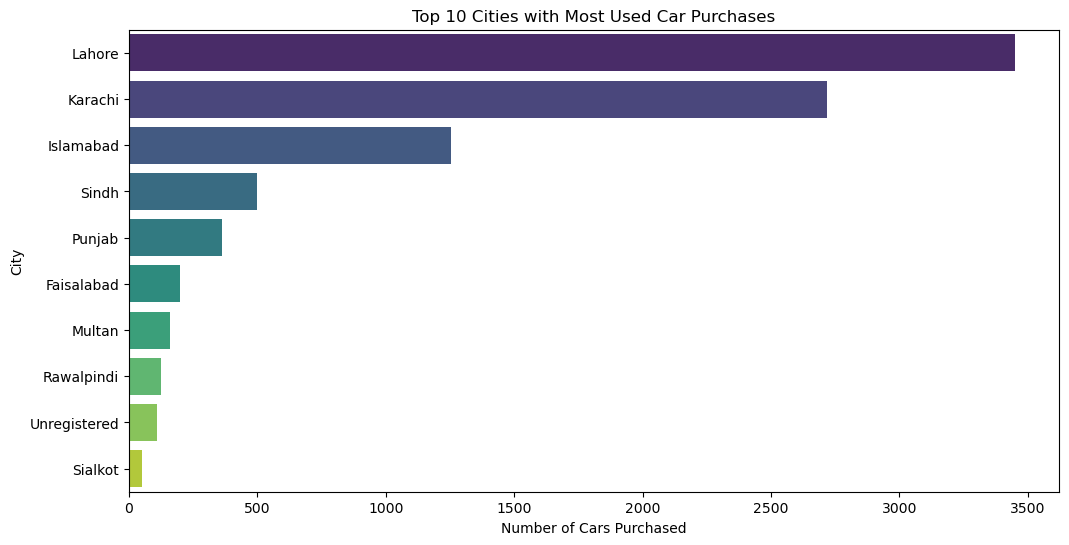

In [6]:
# Visualisasi 10 kota dengan pembelian mobil bekas terbanyak
top_cities = df['Registration city'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_cities.values, y=top_cities.index, palette='viridis')
plt.title('Top 10 Cities with Most Used Car Purchases')
plt.xlabel('Number of Cars Purchased')
plt.ylabel('City')
plt.show()

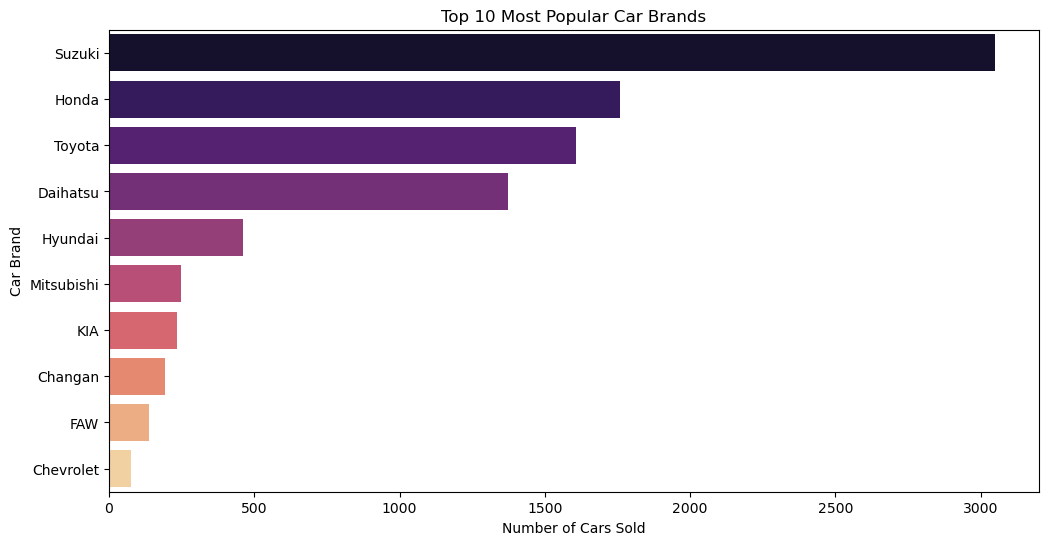

In [7]:
# Visualisasi 10 merek (make) yang paling laris
top_brands = df['Make'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_brands.values, y=top_brands.index, palette='magma')
plt.title('Top 10 Most Popular Car Brands')
plt.xlabel('Number of Cars Sold')
plt.ylabel('Car Brand')
plt.show()